인공신경망



In [1]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

패션 MNIST

In [2]:
from tensorflow import keras
(train_input,train_target),(test_input, test_target) =  keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [4]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


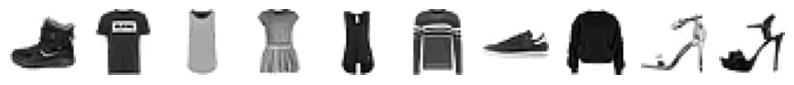

In [5]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(1,10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [6]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [7]:
# 테이터 불균형 여부 확인
import numpy as np
print(np.unique(train_target,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [8]:
# 이미지 전처리  255로 나눈다
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape( 60000,-1  )
train_scaled.shape

(60000, 784)

In [9]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
sgd =  SGDClassifier(loss = 'log_loss',random_state=2)
scores = cross_val_score(sgd,train_scaled,train_target, n_jobs=-1)
scores

array([0.84408333, 0.83275   , 0.82758333, 0.83483333, 0.85133333])

In [10]:
scores.mean()

0.8381166666666667

인공신경망
  -  텐서플로와 케라스

In [11]:
from sklearn.model_selection import train_test_split
X_train_sacled,X_test_scaled,y_train_scaled, y_test_scaled =  train_test_split(train_scaled, train_target, test_size=0.2, random_state=2)

In [13]:
dens = keras.layers.Dense(10,activation='softmax', input_shape=(784,))
model = keras.Sequential(dens)

학습

In [17]:
model.compile(loss = 'sparse_categorical_crossentropy',metrics='accuracy')
model.fit(X_train_sacled,y_train_scaled,epochs=10)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4247 - accuracy: 0.8570
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4196 - accuracy: 0.8578
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4178 - accuracy: 0.8606
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4126 - accuracy: 0.8618
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4120 - accuracy: 0.8633
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4086 - accuracy: 0.8633
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4072 - accuracy: 0.8636
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4057 - accuracy: 0.8644
Epoch 9/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4043 - accuracy: 0.8656
Epoch 10/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.402

In [18]:
model.evaluate(X_test_scaled,y_test_scaled)

375/375 [==============================] - 1s 2ms/step - loss: 0.4440 - accuracy: 0.8523


[0.4440072774887085, 0.8523333072662354]

심층 신경망

In [50]:
# 밀집층을 두개 만든다
dense1 = keras.layers.Dense(100,activation='sigmoid',input_shape=(784,))
dense2 = keras.layers.Dense(10,activation='softmax')
model = keras.Sequential([dense1,dense2])

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
model.compile(loss = 'sparse_categorical_crossentropy',metrics='accuracy')
model.fit(X_train_sacled,y_train_scaled,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5708 - accuracy: 0.8068
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4117 - accuracy: 0.8513
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3775 - accuracy: 0.8637
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3539 - accuracy: 0.8737
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3375 - accuracy: 0.8780


더 많은 층으로 학습하기

In [53]:
# 밀집층을 5개 만든다
dense1 = keras.layers.Dense(100,activation='sigmoid',input_shape=(784,))
dense2 = keras.layers.Dense(50,activation='sigmoid')
dense3 = keras.layers.Dense(25,activation='sigmoid')
dense4 = keras.layers.Dense(15,activation='sigmoid')
dense5 = keras.layers.Dense(10,activation='softmax')
model = keras.Sequential([dense1,dense2,dense3,dense4,dense5])

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 50)                5050      
                                                                 
 dense_10 (Dense)            (None, 25)                1275      
                                                                 
 dense_11 (Dense)            (None, 15)                390       
                                                                 
 dense_12 (Dense)            (None, 10)                160       
                                                                 
Total params: 85375 (333.50 KB)
Trainable params: 85375 (333.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
# 컴파일 하고 학습하기
model.compile(loss = 'sparse_categorical_crossentropy',metrics='accuracy')
model.fit(X_train_sacled,y_train_scaled,epochs=20)

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3873 - accuracy: 0.8656
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3647 - accuracy: 0.8719
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3458 - accuracy: 0.8784
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3315 - accuracy: 0.8832
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3206 - accuracy: 0.8870
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3094 - accuracy: 0.8895
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3005 - accuracy: 0.8934
Epoch 8/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2933 - accuracy: 0.8944
Epoch 9/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2855 - accuracy: 0.8963
Epoch 10/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.277

In [57]:
model.evaluate(X_train_sacled,y_train_scaled)

1500/1500 [==============================] - 4s 2ms/step - loss: 0.2149 - accuracy: 0.9207


[0.21486550569534302, 0.9206666946411133]

딥러닝 학습전략 및 현황

In [ ]:
# 1000개의 데이터 포인트를  생성
# x1은 평균값을 0으로 갖고 표준편차가 0.55인 정규분포를 생성 y1은 x1의 데이터를 이용해서 기울기는 0.1, 절편은 0.3인 방정식을 이용해 만듦
# 이때 y절편에 평균값0, 표준편차가 0.03인 정규분포를 더해서 포인트를 방적식이 만든 직선의 y축 방향으로 흩어지게

In [29]:
num_points = 1000
vectors_set = []
for i in range(num_points):
  x1 = np.random.normal(0.0,0.55)
  y1 = x1*0.1+0.3+np.random.normal(0,0.03)
  vectors_set.append([x1,y1])

In [30]:
vectors_set = np.array(vectors_set)

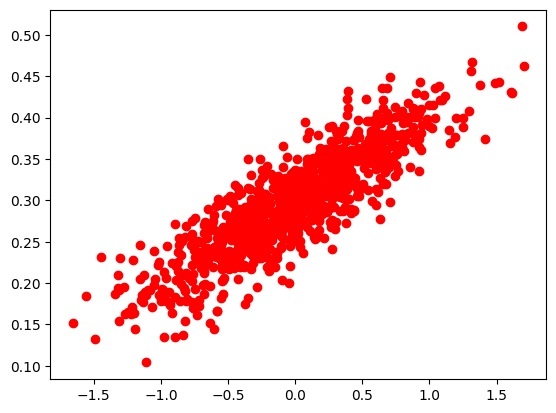

In [34]:
# vectors_set 2차원
import matplotlib.pyplot as plt
plt.scatter(vectors_set[:,0],vectors_set[:,1],c='red')
plt.show()

In [35]:
 # -1 ~ 1사이의 랜덤한 균등분포 값으로 1차원 가중체 텐서를 만듦, 바이어스 텐서는 0으로 초기화를 1차원 텐서

In [37]:
import tensorflow as tf

x_data = vectors_set[:,0]
y_data = vectors_set[:,1]

W = tf.Variable( tf.random.uniform([1],-1,1))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

loss 함수를 정의하고 최적화 방법은 학습속도 0.5인 그래디언트 디센트를 사용

In [ ]:
# import tensorflow as tf

# # 손실 함수 정의
# loss = tf.reduce_mean(tf.square(y - y_data))  # 평균 제곱 오차

# # 옵티마이저 정의
# opt = tf.compat.v1.train.GradientDescentOptimizer(0.5)

# # 훈련 연산 정의
# train = opt.minimize(loss)